# Lab 6 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [13]:
'''
    Your answer: 
    To begin constructing Adaboost,
    it is initially assumed that the classifiers will yield outputs of either -1 or 1,
    due to the use of the exponential loss function. 
    However, the final voting scheme is the only part of the algorithm that is dependent on the class labels.
    The standard voting scheme for Adaboost uses the sum of the alphas assigned to the weak classifiers voting for the first class,
    and compares it to the sum of the alphas assigned to the weak classifiers voting for the second class.
    This comparison is made based on the sign of the summation.
    Alternatively, we have covered a different formulation in the slides that can check for the same conditions regardless of the class labels used.
'''

'\n    Your answer: \n    To begin constructing Adaboost,\n    it is initially assumed that the classifiers will yield outputs of either -1 or 1,\n    due to the use of the exponential loss function. \n    However, the final voting scheme is the only part of the algorithm that is dependent on the class labels.\n    The standard voting scheme for Adaboost uses the sum of the alphas assigned to the weak classifiers voting for the first class,\n    and compares it to the sum of the alphas assigned to the weak classifiers voting for the second class.\n    This comparison is made based on the sign of the summation.\n    Alternatively, we have covered a different formulation in the slides that can check for the same conditions regardless of the class labels used.\n'

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **X_test**| The input features for the testing set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [14]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

import utils

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### TODO: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [15]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    
    #TODO: FILL THE FUNCTION with the implementation as the steps above

    # TODO [1]: Initialize weights
    w = np.array([1/len(X_train) for x in X_train ]) 

    ## TODO [2]:  Initialize the training and test data with empty array placeholders
    #### Hint: what should be their shape?
    pred_train = np.zeros((T,len(Y_train) )) ## predicted classes of the training examples
    pred_test = np.zeros((T,len(Y_test) ))  ## predicted classes of the test examples

    ## TODO [3]: loop over the boosting iterations 
    for i in range(T): 

        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        clf = clf.fit(X_train,Y_train, w)
        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = clf.predict(X_train) 
        pred_test_i = clf.predict(X_test)
        
        # TODO [5]: calculate the miss Indicator function
        miss_indicator = (pred_train_i != Y_train)
        # TODO [6]: calculate the error for the current classifier (err_t)
        err_t = np.sum(w * miss_indicator)/np.sum(w)
        
        # TODO [7]: calculate current classifier weight (Alpha_t)
        alpha_t = np.log((1-err_t)/err_t)
        
        # TODO [8]: update the weights 
        w = w * np.exp(alpha_t * miss_indicator)
        # TODO [9] Add to the overall predictions
        pred_train[i] = pred_train_i * alpha_t
        pred_test[i] = pred_test_i * alpha_t

        
    # TODO [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py

    pred_train = np.sum(pred_train, axis=0)
    pred_test = np.sum(pred_test, axis=0)

    pred_train[pred_train >= 0], pred_train[pred_train < 0]= 1, -1
    pred_test[pred_test >= 0], pred_test[pred_test < 0]= 1, -1


    train_error = utils.get_accuracy(pred_train, Y_train ) #Not error but accurancy (treated like accurancy in the code written below)!
    test_error = utils.get_accuracy(pred_test, Y_test ) 
    
    
    return train_error, test_error

### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Accuracy: Training: 0.6637 - Test: 0.6479
Number of Iterations :  60
Accuracy: Training: 0.7979 - Test: 0.7917
Number of Iterations :  110
Accuracy: Training: 0.8689 - Test: 0.8517
Number of Iterations :  160
Accuracy: Training: 0.8859 - Test: 0.8667
Number of Iterations :  210
Accuracy: Training: 0.8894 - Test: 0.8754
Number of Iterations :  260
Accuracy: Training: 0.9032 - Test: 0.8846
Number of Iterations :  310
Accuracy: Training: 0.9146 - Test: 0.8983
Number of Iterations :  360
Accuracy: Training: 0.9213 - Test: 0.9121


d:\NN Labs\Lab 6 - AdaBoost Classifier\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


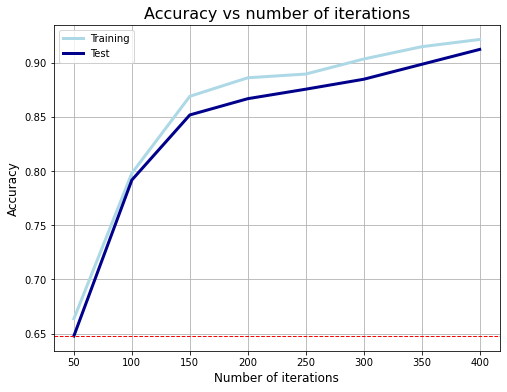

In [16]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)


X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(np.array(Y_train),np.array( X_train),np.array( Y_test), np.array(X_test), i, clf_tree)
    utils.print_accuracy(acc_i)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
utils.plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [17]:
'''
    Your answer:
    It's increasing. There is a huge decrease in slope starting from 100 iterations.
    and then the slope keeps decreasing till it is almost 0 after 350 iterations.
    The classifier's accuracy improves over iterations as it learns from its mistakes in each iteration. 
    The classifier is weighted based on the new resulting loss it computes,
    with a larger weight assigned to smaller losses.
    This natural process leads to an increase in accuracy with each iteration as the classifier learns more.
    However, at some point, the accuracy begins to decrease and then flatten out.
    This indicates that there is less to learn with each iteration,
    compared to the beginning where there was much to learn with a 65% accuracy rate.
    Hence, it is expected that the rate of improvement in accuracy will slow down as the iterations progress.
'''

"\n    Your answer:\n    It's increasing. There is a huge decrease in slope starting from 100 iterations.\n    and then the slope keeps decreasing till it is almost 0 after 350 iterations.\n    The classifier's accuracy improves over iterations as it learns from its mistakes in each iteration. \n    The classifier is weighted based on the new resulting loss it computes,\n    with a larger weight assigned to smaller losses.\n    This natural process leads to an increase in accuracy with each iteration as the classifier learns more.\n    However, at some point, the accuracy begins to decrease and then flatten out.\n    This indicates that there is less to learn with each iteration,\n    compared to the beginning where there was much to learn with a 65% accuracy rate.\n    Hence, it is expected that the rate of improvement in accuracy will slow down as the iterations progress.\n"

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [18]:
'''
    Your answer:
    #Elbow method :
    The elbow method is often used to select the number of clusters in k-means.
    The method involves observing the loss function as it decreases with the number of clusters
    and identifying the "elbow" point where the rate of decrease slows down.
    Similarly, a similar heuristic can be used to determine the optimal number of iterations for AdaBoost.
    It makes sense to stop at this point because continuing beyond this point may not provide much additional benefit 
    while increasing the risk of overfitting the model, without requiring any additional computational or time resources.
    #Other Methods :
        1.Cross-validation: One of the most common techniques for hyperparameter tuning is cross-validation. 
        In this method, the dataset is split into k-folds, and the algorithm is trained on k-1 folds and validated on the remaining fold.
        The process is repeated k times, and the average validation score is used to select the optimal number of iterations.

        2.Learning Curve: Plotting the learning curve, which is the performance metric (such as accuracy or AUC) against the number of iterations,
        can help to visualize the relationship between the two. If the curve is still improving as the number of iterations increases,
        then adding more iterations may improve the model's performance.

        3.Early Stopping: Early stopping is a technique used to prevent overfitting,
        where training is stopped before the model's performance starts to degrade on a validation set.
        By monitoring the performance metric on a validation set, training can be stopped when the performance starts to plateau,
        indicating that the model has reached its optimal number of iterations.
'''

'\n    Your answer:\n    #Elbow method :\n    The elbow method is often used to select the number of clusters in k-means.\n    The method involves observing the loss function as it decreases with the number of clusters\n    and identifying the "elbow" point where the rate of decrease slows down.\n    Similarly, a similar heuristic can be used to determine the optimal number of iterations for AdaBoost.\n    It makes sense to stop at this point because continuing beyond this point may not provide much additional benefit \n    while increasing the risk of overfitting the model, without requiring any additional computational or time resources.\n    #Other Methods :\n        1.Cross-validation: One of the most common techniques for hyperparameter tuning is cross-validation. \n        In this method, the dataset is split into k-folds, and the algorithm is trained on k-1 folds and validated on the remaining fold.\n        The process is repeated k times, and the average validation score is us